In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
import time

time_start = time.time() 

Exercise H9.1:  1d Self-Organizing Map for 2d data

In [3]:
def neighborhood_func(q, p, sigma):
    return np.exp(-((q-p)**2)/(2*sigma**2))

In [4]:
def generate_w_random(n_features, m, data):
    w = np.ones((n_features, m))
    w = np.multiply(w.T, np.mean(data, axis=1)).T + np.random.normal(scale=1e-1, size=w.shape)

    return w


In [5]:
def som_1d(data, m, eps_0=0.5, sigma_0=1, eps_scale=0.99, sigma_scale=0.99, anneal_eps=0.5, anneal_sigma=0.5, w_func = generate_w_random):
    # initializing prototypes 
    n_features = data.shape[0]
    n_data = data.shape[1]
    
    w = w_func(n_features, m, data)

    ws =[w.copy()]

    # initializing q
    q = np.arange(0, m, 1)

    # initializing annealing
    eps_multiplier = np.ones(n_data)
    eps_multiplier[int(anneal_eps*n_data):] = eps_scale 
    eps = eps_0

    sigma_multiplier = np.ones(n_data)
    sigma_multiplier[int(anneal_sigma*n_data):] = sigma_scale 
    sigma = sigma_0

    # learning
    dst_arr = np.zeros(m)

    perm = np.random.permutation(n_data)

    for j in range(n_data):
        idx = perm[j]
        #idx = j

        eps *= eps_multiplier[j]
        sigma *= sigma_multiplier[j]
        
        for k in range(m):
            dst_arr[k] = np.linalg.norm(data[:, idx] - w[:,k])

        p = np.argmin(dst_arr)

        h = neighborhood_func(q, p, sigma)
        
        for k in range(m):
            del_w = eps * h[k] * (data[:, idx] - w[:,k])
            w[:,k] += del_w

        ws.append(w.copy())
            
    return ws[::-1]

In [6]:
def som_1d_predict(data, w):
    n_features = data.shape[0]
    n_data = data.shape[1]
    m = w.shape[1]
    m_arr = np.zeros(n_data)
    for j in range(n_data):
        dst_arr = np.zeros(m)
        for k in range(m):
            dst_arr[k] = np.linalg.norm(data[:, j] - w[:,k])
        m_arr[j] = np.argmin(dst_arr)
    return m_arr

In [7]:
def get_color(m):
    b = np.linspace(0,1,m).tolist()
    r = np.linspace(1,0,m).tolist()
    g = np.zeros(m).tolist()
    return list(zip(r,g,b))

In [8]:
n = 20000
xy_min = [0, 0]
xy_max = [2, 1]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2)).T


In [9]:
ms = [4, 8, 16, 32, 64, 128]

ws = []
for m in ms:
    ws.append(som_1d(data, m=m,  eps_0=0.5, sigma_0=6, anneal_sigma=0.5, anneal_eps=0.5)[0])

In [10]:
def plot_data(data, w, m):
    colors = get_color(m)
    
    plt.scatter(data[0], data[1], color='gray', alpha=0.05)
    
    for i in range(m):
        plt.scatter(w[0,i], w[1,i], color=colors[i])

    plt.title('map m={}'.format(m))
    plt.show()

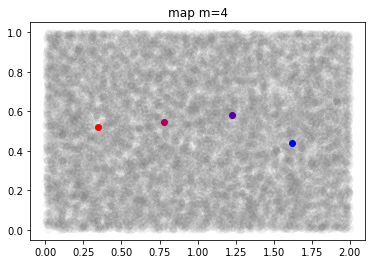

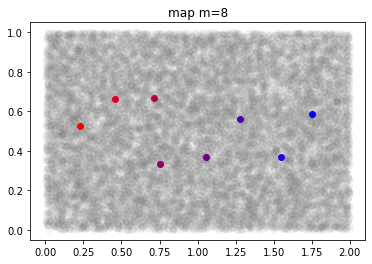

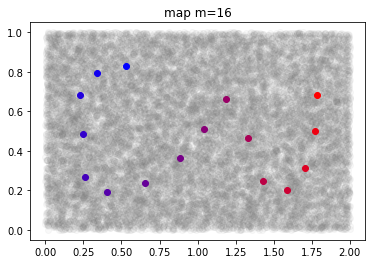

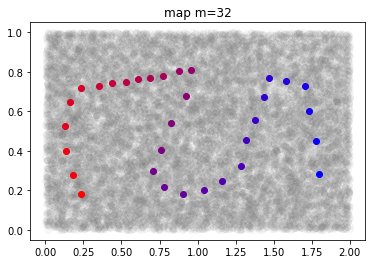

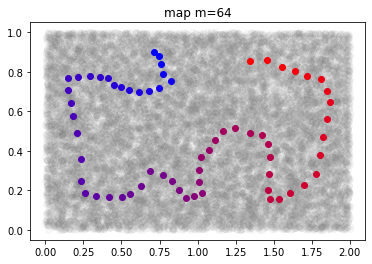

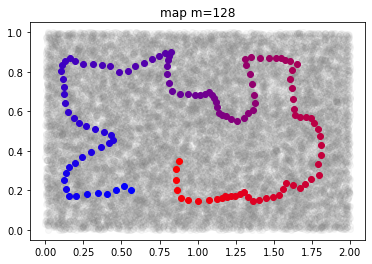

In [11]:
for i,m in enumerate(ms):
    plot_data(data, ws[i], m)

Exercise H9.2:  1d Self-Organizing Maps for 3d data

In [12]:
def plot_3d(data, w, m):
    colors = get_color(m)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(data[0], data[1], data[2], color='gray', alpha=0.01)
    for i in range(m):
       ax.scatter3D(w[0,i], w[1,i], w[2,i], color=colors[i])
    ax.set_xlabel('x')
    ax.set_xlabel('y')
    ax.set_xlabel('z')
    ax.set_title('Spiral Plot M:{}'.format(m));
    plt.show()

In [13]:
spiral = np.loadtxt('spiral.csv', skiprows=1,usecols=(1,2,3), delimiter=',').T

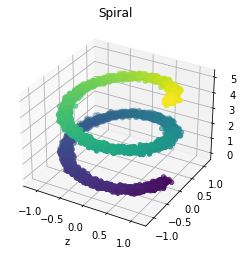

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(spiral[0], spiral[1], spiral[2], c=spiral[2])
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')
ax.set_title('Spiral');

In [15]:
def generate_w_3d(n_features, m, data):
    w = np.zeros((n_features, m))
    w[-1] = np.linspace(0, 5, m)
    return w

In [16]:
ms_spiral = [16, 32, 64, 128] 

ws = []
for m in ms_spiral:    
    ws.append(som_1d(spiral, eps_0=0.5, sigma_0=6, anneal_sigma=0.2, anneal_eps=0.2, m=m, w_func=generate_w_3d)[0])    

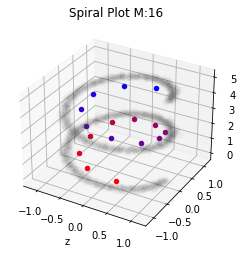

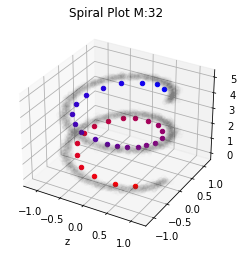

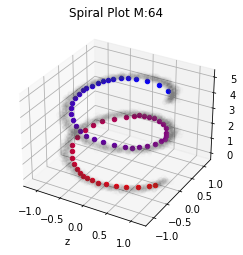

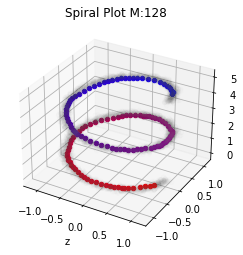

In [17]:
for i,m in enumerate(ms_spiral):
    plot_3d(spiral, ws[i], m)

Exercise H9.3:  2d Self-Organizing Maps for 3d data

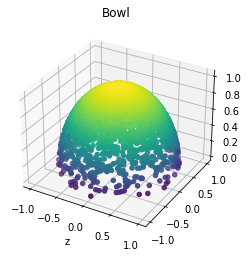

In [18]:
bowl = np.loadtxt('bowl.csv', skiprows=1,usecols=(1,2,3), delimiter=',').T

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(bowl[0], bowl[1], bowl[2], c=bowl[2])
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')
ax.set_title('Bowl');

In [19]:
def neighborhood_func_2d(q, p, sigma):
    return np.exp(-(np.linalg.norm(q-p, axis=0)**2)/(2*sigma**2))

In [20]:
def som_2d(data, m, eps_0=0.5, sigma_0=1, eps_scale=0.99, sigma_scale=0.99, anneal_eps=0.5, anneal_sigma=0.5, w_func = generate_w_random):
    # initializing prototypes 
    n_features = data.shape[0]
    n_data = data.shape[1]
    
    w = w_func(n_features, m*m, data)

    ws =[w.copy()]

    # initializing q
    qx = np.arange(0, m, 1)
    qy = np.arange(0, m, 1)
    
    xx,yy = np.meshgrid(qx, qy)
    q = np.array([yy, xx]).reshape((2,-1))
    
    # initializing annealing
    eps_multiplier = np.ones(n_data)
    eps_multiplier[int(anneal_eps*n_data):] = eps_scale 
    eps = eps_0

    sigma_multiplier = np.ones(n_data)
    sigma_multiplier[int(anneal_sigma*n_data):] = sigma_scale 
    sigma = sigma_0

    # learning
    dst_arr = np.zeros(m*m)

    perm = np.random.permutation(n_data)

    for j in range(n_data):
        idx = perm[j]
        #idx = j

        eps *= eps_multiplier[j]
        sigma *= sigma_multiplier[j]
        
        for k in range(m*m):
            dst_arr[k] = np.linalg.norm(data[:, idx] - w[:,k])

        p = q[:,[np.argmin(dst_arr)]]

        h = neighborhood_func_2d(q, p, sigma)
        
        for k in range(m*m):
            del_w = eps * h[k] * (data[:, idx] - w[:,k])
            w[:,k] += del_w

        ws.append(w.copy())
            
    return ws[::-1]

In [21]:
def get_color_2d(m):
    b = np.linspace(0,1,m)
    r = np.linspace(0,1,m)
    
    cx,cy = np.meshgrid(b,r)
    cc = np.array([cy, cx]).reshape((2,-1))
    
    g = np.zeros(m*m)
    
    cc = np.vstack((cc, g)).T
    return list(map(tuple, cc))

In [22]:
def plot_3d_2d(data, w, m, title_postfix=''):
    colors = get_color_2d(m)
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(data[0], data[1], data[2], color='gray', alpha=0.04)
    for i in range(m*m):
        ax.scatter3D(w[0,i], w[1,i], w[2,i], color=colors[i])
    ax.set_xlabel('x')
    ax.set_xlabel('y')
    ax.set_xlabel('z')
    ax.set_title('Spiral Plot M:{} '.format(m) + title_postfix);
    plt.show()

In [23]:
ms_bowl = [8, 16, 32] 

ws = []
for m in ms_bowl:    
    ws.append(som_2d(bowl, eps_0=0.5, sigma_0=6, anneal_sigma=0.2, anneal_eps=0.2, m=m, w_func=generate_w_random))

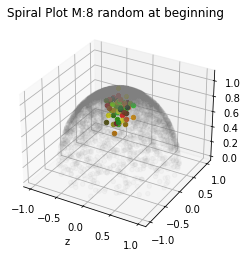

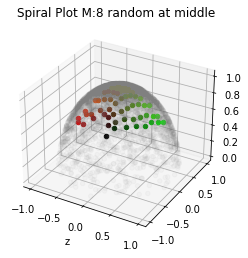

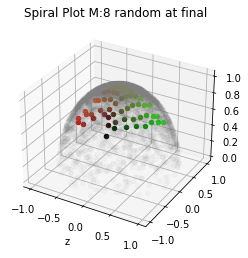

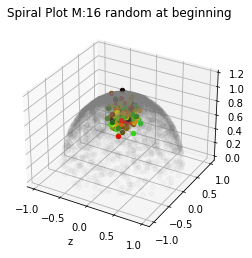

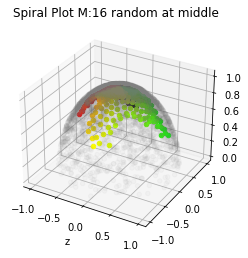

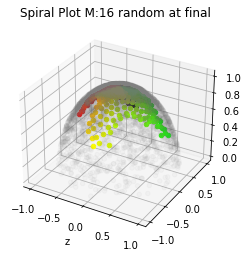

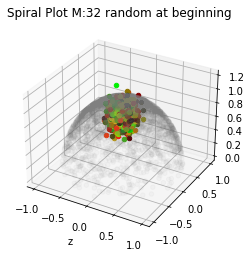

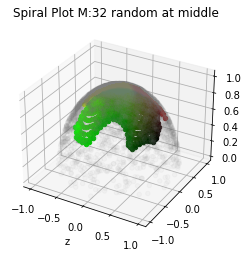

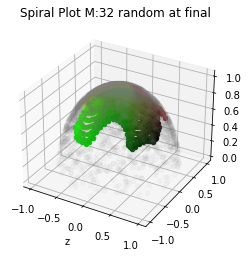

In [24]:
mid = int(0.5*bowl.shape[1])

for i,m in enumerate(ms_bowl):
    
    plot_3d_2d(bowl, ws[i][-1], m, title_postfix='random at beginning')
    plot_3d_2d(bowl, ws[i][mid], m, title_postfix='random at middle')
    plot_3d_2d(bowl, ws[i][0], m, title_postfix='random at final')
    

In [25]:
def generate_w_pc(n_features, m, data):
    pca = PCA(n_components=2)
    pca.fit(data.T)
    
    e_vec = pca.components_.T
    e_val = pca.explained_variance_.T
    
    mean = pca.mean_
        
    w = np.ones((n_features, m))

    spread1 = e_vec[:,[0]]@np.random.uniform(low=-1, size=m).reshape((1,m))
    spread2 = e_vec[:,[1]]@np.random.uniform(low=-1, size=m).reshape((1,m))

    w = np.multiply(w.T, mean).T + spread1 + spread2
    
    return w

In [26]:
ws = []
for m in ms_bowl:    
    ws.append(som_2d(bowl, eps_0=0.5, sigma_0=6, anneal_sigma=0.2, anneal_eps=0.2, m=m, w_func=generate_w_pc))

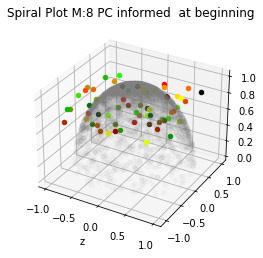

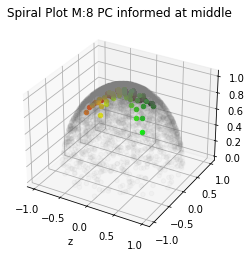

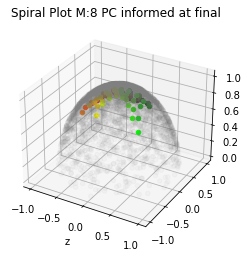

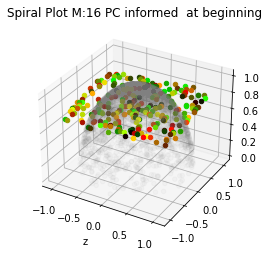

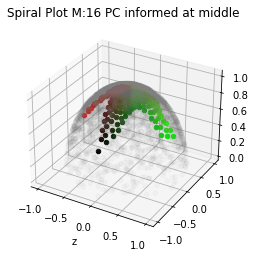

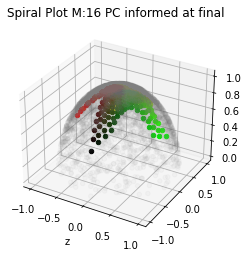

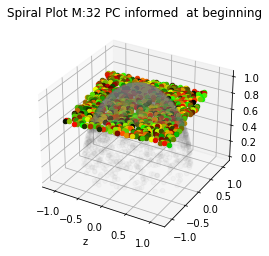

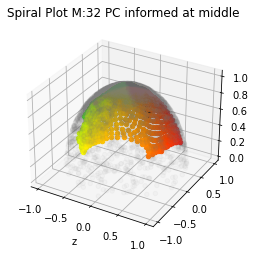

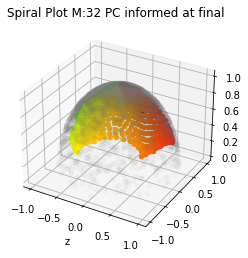

In [27]:
for i,m in enumerate(ms_bowl):
    
    plot_3d_2d(bowl, ws[i][-1], m, title_postfix='PC informed  at beginning')
    plot_3d_2d(bowl, ws[i][mid], m, title_postfix='PC informed at middle')
    plot_3d_2d(bowl, ws[i][0], m, title_postfix='PC informed at final')
    

Exercise H9.4:  Locally Linear Embedding

In [28]:
embedding = LocallyLinearEmbedding(n_components = 1)
spiral_transformed = embedding.fit_transform(spiral.T)

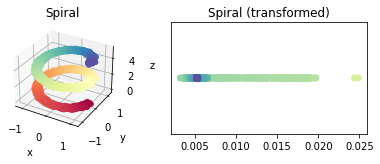

In [29]:
fig = plt.figure()
clr = np.arange(0, spiral.shape[1], 1) 

ax  = fig.add_subplot(221, projection='3d')

ax.scatter3D(spiral[0], spiral[1], spiral[2], c=clr, cmap=plt.cm.Spectral)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Spiral')

ax2 = fig.add_subplot(222)
ax2.scatter(spiral_transformed, np.zeros_like(spiral_transformed), c=clr, cmap=plt.cm.Spectral)
ax2.set_title('Spiral (transformed)')
ax2.set_yticks([])
#ax[1].set_title('Bowl')

fig.tight_layout()


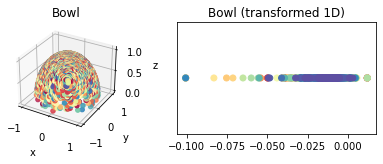

In [30]:
embedding = LocallyLinearEmbedding(n_components = 1)
bowl_transformed_1 = embedding.fit_transform(bowl.T)

clr = np.arange(0, bowl.shape[1], 1) 

fig = plt.figure()
ax  = fig.add_subplot(221, projection='3d')

ax.scatter3D(bowl[0], bowl[1], bowl[2], c=clr, cmap=plt.cm.Spectral)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bowl')

ax2 = fig.add_subplot(222)
ax2.scatter(bowl_transformed_1, np.zeros_like(bowl_transformed_1), c=clr, cmap=plt.cm.Spectral)
ax2.set_title('Bowl (transformed 1D)')
ax2.set_yticks([])
#ax[1].set_title('Bowl')

fig.tight_layout()


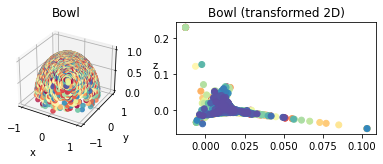

In [31]:
embedding = LocallyLinearEmbedding(n_components = 2)
bowl_transformed_2 = embedding.fit_transform(bowl.T)

clr = np.arange(0, bowl.shape[1], 1) 

fig = plt.figure()
ax  = fig.add_subplot(221, projection='3d')

ax.scatter3D(bowl[0], bowl[1], bowl[2], c=clr, cmap=plt.cm.Spectral)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bowl')

ax2 = fig.add_subplot(222)
ax2.scatter(bowl_transformed_2[:,0], bowl_transformed_2[:,1], c=clr, cmap=plt.cm.Spectral)
ax2.set_title('Bowl (transformed 2D)')
#ax2.set_yticks([])

#ax[1].set_title('Bowl')

fig.tight_layout()


In [32]:
dur_time = time.time() - time_start
print(dur_time) 

425.739773273468


In [33]:
# windows 516.1757228374481